In [ ]:
!pip install matplotlib

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install networkx

In [ ]:
!pip install scipy

In [ ]:
!pip install pandas

In [ ]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=28953ceebb1dc5b57dfa193523ccbeb1be1684a5fe66f40921a875636c178672
  Stored in directory: c:\users\ioannis\appdata\local\pip\cache\wheels\9b\13\01\6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
Successfully built sklearn


In [ ]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd
import random
import sklearn
from sklearn import utils
import functools

In [ ]:
G=nx.barabasi_albert_graph(4038, 22, seed=None, initial_graph=None)

In [ ]:
%store G

Stored 'G' (Graph)


In [ ]:
%store -r G
%store -r V

no stored variable or alias V


In [ ]:
def select_random_edges(edge_list,n):
    random_edges = []
    counter = 0
    edge_list_length = len(edge_list)
    while True:
        index = random.randint(0,edge_list_length)
        selected_edge = edge_list[index]
        if selected_edge in set(random_edges):
            continue
        random_edges.append(selected_edge)
        if counter == n:
            return random_edges
        counter += 1

## Δημιουργούμε έναν συμπληρωματικό γράφο με τυχαίες ακμές οι οποίες δεν υπάρχουν στον κύριο γράφο

## Κοιτάμε στο 50% των ζευγαριών να υπάρχει ακμή για να μην ευνοηθεί καμία κατηγορία κατά την διάρκεια του training

In [ ]:
G_co=nx.complement(G)
co_edges=G_co.edges
G_co=nx.Graph()
G_co.add_edges_from(select_random_edges(list(co_edges),len(list(G.edges))-1))
print(len(list(G_co.edges))==len(list(G.edges)))
%store G_co

True
Stored 'G_co' (Graph)


## Για αρχή φτιάχνουμε το dictionary clustering_pair όπου υπολογίζεται το clustering coefficient για κάθε κόμβο

## Αυτό γιατί αν γίνεται ο υπολογισμός την ώρα που μπαίνει ως input το κάθε ζευγάρι λόγο  σχετικάς μικρής ταχύτητας υπολογισμού θα πάρει πάνω από 2 ώρες

### Υπάρχει διαφορετικός τρόπος υλοποίησης της common_neighboors σε σχέση με άλλες συναρτήσεις της networkx

### Η for loop υλοποιείται παρακάτω

In [ ]:
clustering_pair={}
for node in list(G.nodes):
    clustering_pair[node]=nx.clustering(G,node)

def create_attribute(name,nxfunction,Graph):
    work=True
    if name in ["common_neighbors","Clustering Coefficient"]:
        work=False
    dict_name={}
    for u,v in Graph.edges:
        metric=nxfunction(Graph,[(u,v)])
        for_loop(dict_name,u,v,metric,work)
    nx.set_edge_attributes(Graph,dict_name,name)

def common_neighbors(Graph,list_par):
    return len(list(nx.common_neighbors(Graph,list_par[0][0],list_par[0][1])))
    
def clustering_coefficient_pair(Graph,list_par):
    return clustering_pair[list_par[0][0]]*clustering_pair[list_par[0][1]]

In [ ]:
names=["common_neighbors","jaccard's coefficient","Resource allocation","Adamic/Adar","Preferential Attachment",
      "Clustering Coefficient"]
functions=[common_neighbors,nx.jaccard_coefficient,nx.resource_allocation_index,nx.adamic_adar_index,
          nx.preferential_attachment,clustering_coefficient_pair]
metrics= {names[i]: functions[i] for i in range(len(functions))}
#for i in range(len(functions)):
    #create_attribute(names[i],functions[i],G)

In [ ]:
def create_dict_attribute(name,Graph):
    create_attribute(name,metrics[name],Graph)
    #%store G

In [ ]:
#create_dict_attribute("common_neighbors")
#create_dict_attribute("jaccard's coefficient")
Graphs=[G,G_co]
for Graph in Graphs:
    for name in names[0:len(functions)]:
        
        def for_loop(dictionary,key1,key2,iterated_object,work=True):
            if work:
                for u,v,p in iterated_object:
                    dictionary[key1,key2]=round(p,8)
            else:
                dictionary[key1,key2]=iterated_object
                
        create_dict_attribute(name,Graph)
        print("-"*25)
    print("-"*50)
%store G
%store G_co

-------------------------
-------------------------
-------------------------
-------------------------
-------------------------
-------------------------
--------------------------------------------------
-------------------------
-------------------------
-------------------------
-------------------------
-------------------------
-------------------------
--------------------------------------------------
Stored 'G' (Graph)
Stored 'G_co' (Graph)


In [ ]:
def add_link_existance(Graph,value):
    nodes=list(Graph.nodes)
    link_existance={}
    for u,v in Graph.edges:
        link_existance[u,v]=value
    nx.set_edge_attributes(Graph,link_existance,"link_existance")
    
Graphs=[G_co,G]
for i in range(2):
    add_link_existance(Graphs[i],i)
%store G
%store G_co

Stored 'G' (Graph)
Stored 'G_co' (Graph)


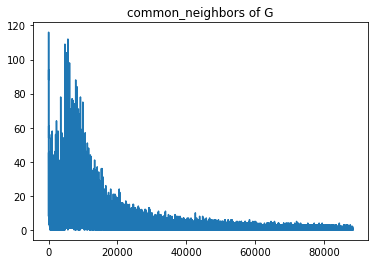

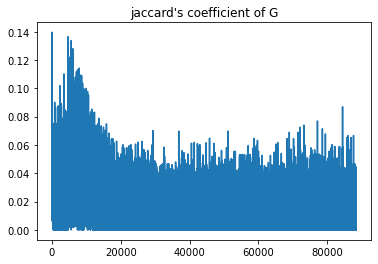

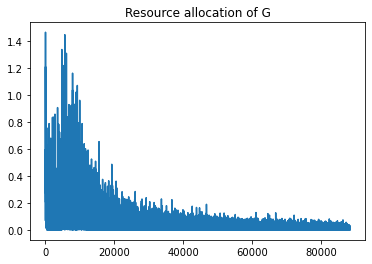

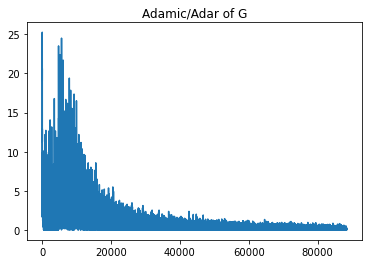

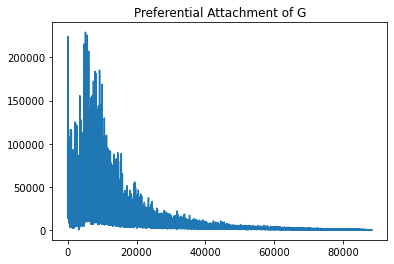

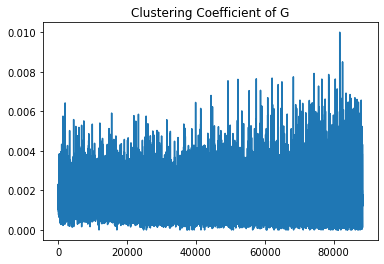

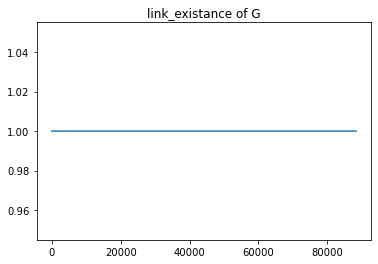

-----


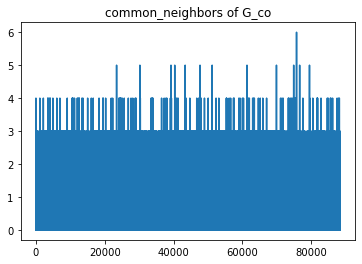

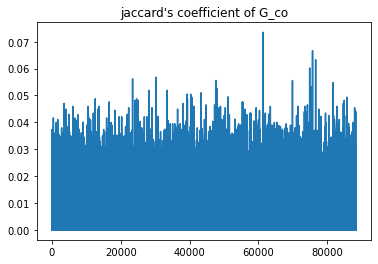

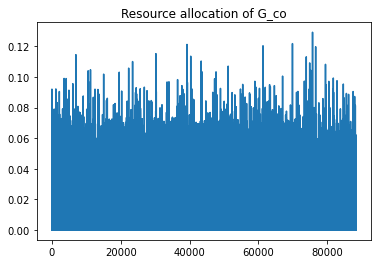

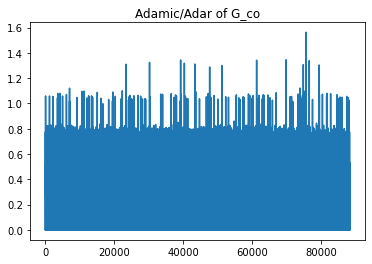

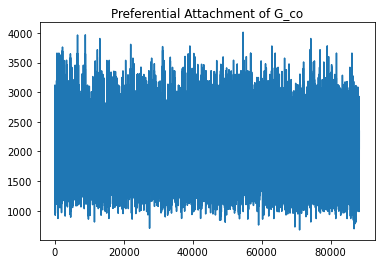

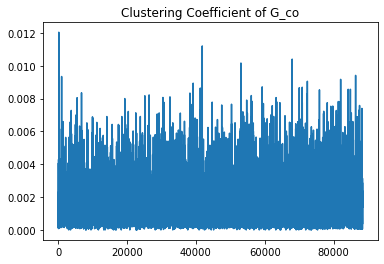

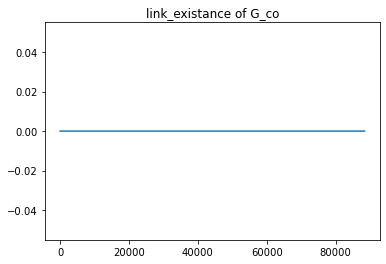

In [ ]:
Graphs=[G,G_co]
Graph_names=["G","G_co"]
for i in range(2):
    if i==1:
         print("-"*5)
    for name in names[0:len(functions)]+["link_existance"]:
        plt.title(name+" of "+Graph_names[i])
        plt.plot(range(len(nx.get_edge_attributes(Graphs[i],name).keys())),
                 nx.get_edge_attributes(Graphs[i],name).values())
        plt.show()

In [ ]:
def dataGraph(Graph):
    return nx.to_pandas_edgelist(Graph,nodelist=list(Graph.nodes))
data=pd.concat([dataGraph(G),dataGraph(G_co)])
%store data

Stored 'data' (DataFrame)


In [ ]:
%store -r data

In [ ]:
def mydata_train(value,data):
    train_data=data.loc[data['link_existance']==value]
    return train_data.loc[data['link_existance']==value].head(int(0.8*train_data.shape[0]))

def mydata_test(data,train_data):
    return data[~data.isin(train_data)].dropna()

In [ ]:
data_shuffled=utils.shuffle(data)

data_shuffled["key"]=[str(sublist[0])+" "+str(sublist[1])for sublist in 
                      zip(data_shuffled["source"], data_shuffled["target"])]

#str(data_shuffled["source"])+str(data_shuffled["target"])


data_shuffled = pd.DataFrame(data_shuffled).set_index('key')


train_data=pd.concat([mydata_train(0,data_shuffled),mydata_train(1,data_shuffled)])
train_data_source=np.copy(train_data[["source"]])
train_data_target=np.copy(train_data[["target"]])
    
test_data=mydata_test(data_shuffled,train_data)
test_data_source=np.copy(test_data[["source"]])
test_data_target=np.copy(test_data[["target"]])


# Attributes 
## common_neighbors
## jaccard's coefficient : πόσο γνωστοί είμαστε στους φίλους μας
## Resource allocation : αντίστροφο άθροισμα επαφών κοινών φίλων
## Adamic/Adar : το παραπάνω στον λογάριθμο
## Preferential Attachment : γινόμενο γειτόνων
## clustering_coefficient : γινόμενων %κλίκας φίλων
## link_existance : 1 αν υπάρχει ακμή που τους ενώνει αλλιώς 0 


In [ ]:
def normalization(df): 
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

Y_train=train_data[["link_existance"]]
Y_test=test_data[["link_existance"]]
X_train=train_data.drop(["link_existance","source","target"],axis=1)
X_test=test_data.drop(["link_existance","source","target"],axis=1)
Y_train=np.ravel(Y_train)
Y_test=np.ravel(Y_test)
Y_test=[int(y) for y in Y_test]
X_train=normalization(X_train)
X_test=normalization(X_test)

#### let's see what happeneds with all attributes

In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1

    return(TP, FP, TN, FN)

from sklearn.linear_model import LogisticRegression
clf=LogisticRegression().fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
measure=perf_measure(Y_test,Y_pred)
words=["True Possitive:","False Positive:","True Negative:","False Negative:"]
for i in range(4):
    print(str(words[i])+" "+str(measure[i]))
print("Accuracy of Prediction: "+str(100*measure[0]/(measure[0]+measure[3])))

print("Precent of 0 values predicted: "
      +str(100*(measure[2]+measure[3])/functools.reduce(lambda a, b: a+b,measure)))

True Possitive: 10526
False Positive: 2260
True Negative: 15411
False Negative: 7145
Accuracy of Prediction: 59.566521419274515
Precent of 0 values predicted: 63.8220813762662


In [ ]:
def keep_attributes(keeped_attributes):
    data_shuffled=utils.shuffle(data)

    data_shuffled["key"]=[str(sublist[0])+" "+str(sublist[1])for sublist in 
                          zip(data_shuffled["source"], data_shuffled["target"])]

    #str(data_shuffled["source"])+str(data_shuffled["target"])


    data_shuffled = pd.DataFrame(data_shuffled).set_index('key')


    train_data=pd.concat([mydata_train(0,data_shuffled),mydata_train(1,data_shuffled)])
    train_data_source=np.copy(train_data[["source"]])
    train_data_target=np.copy(train_data[["target"]])

    test_data=mydata_test(data_shuffled,train_data)
    test_data_source=np.copy(test_data[["source"]])
    test_data_target=np.copy(test_data[["target"]])

    def normalization(df): 
        normalized_df=(df-df.min())/(df.max()-df.min())
        return normalized_df

    Y_train=train_data[["link_existance"]]
    Y_test=test_data[["link_existance"]]
    X_train=train_data.drop(["link_existance","source","target"],axis=1)
    X_test=test_data.drop(["link_existance","source","target"],axis=1)
    X_train=X_train[keeped_attributes]
    X_test=X_test[keeped_attributes]
    Y_train=np.ravel(Y_train)
    Y_test=np.ravel(Y_test)
    Y_test=[int(y) for y in Y_test]
    X_train=normalization(X_train)
    X_test=normalization(X_test)

    def perf_measure(y_actual, y_hat):
        TP = 0
        FP = 0
        TN = 0
        FN = 0

        for i in range(len(y_hat)): 
            if y_actual[i]==y_hat[i]==1:
                TP += 1
            if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
                FP += 1
            if y_actual[i]==y_hat[i]==0:
                TN += 1
            if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
                FN += 1

        return(TP, FP, TN, FN)

    from sklearn.linear_model import LogisticRegression
    clf=LogisticRegression().fit(X_train,Y_train)
    Y_pred=clf.predict(X_test)
    measure=perf_measure(Y_test,Y_pred)
    words=["True Possitive:","False Positive:","True Negative:","False Negative:"]
    for i in range(4):
        print(str(words[i])+" "+str(measure[i]))
    Accuracy=100*measure[0]/(measure[0]+measure[3])
    print("Accuracy of Prediction: "+str(Accuracy))

    print("Precent of 0 values predicted: "
          +str(100*(measure[2]+measure[3])/functools.reduce(lambda a, b: a+b,measure)))
    return Accuracy


In [ ]:
sum_=0
for i in range(5):
    sum_+=keep_attributes(["jaccard's coefficient","Adamic/Adar","Clustering Coefficient"])
    print("-"*30)
print("Average accuracy: "+str(sum_/5))

True Possitive: 9725
False Positive: 5364
True Negative: 12307
False Negative: 7946
Accuracy of Prediction: 55.033670986361834
Precent of 0 values predicted: 57.30575519212269
------------------------------
True Possitive: 9595
False Positive: 5238
True Negative: 12433
False Negative: 8076
Accuracy of Prediction: 54.29800237677551
Precent of 0 values predicted: 58.030105823099994
------------------------------
True Possitive: 8905
False Positive: 4290
True Negative: 13381
False Negative: 8766
Accuracy of Prediction: 50.39329975666346
Precent of 0 values predicted: 62.66481806349386
------------------------------
True Possitive: 9134
False Positive: 4494
True Negative: 13177
False Negative: 8537
Accuracy of Prediction: 51.6892083073963
Precent of 0 values predicted: 61.439646879067396
------------------------------
True Possitive: 9402
False Positive: 4808
True Negative: 12863
False Negative: 8269
Accuracy of Prediction: 53.20581744100504
Precent of 0 values predicted: 59.79288099145493

In [ ]:
def calculate(keeped_attributes):
    sum_=0
    for i in range(5):
        sum_+=keep_attributes(keeped_attributes)
        print("-"*30)
    print("Average accuracy: "+str(sum_/5))
    

In [ ]:
calculate(["jaccard's coefficient","Adamic/Adar","Clustering Coefficient","Preferential Attachment"])

True Possitive: 9204
False Positive: 2931
True Negative: 14740
False Negative: 8467
Accuracy of Prediction: 52.08533755871201
Precent of 0 values predicted: 65.66408239488428
------------------------------
True Possitive: 10122
False Positive: 4330
True Negative: 13341
False Negative: 7549
Accuracy of Prediction: 57.28028974025239
Precent of 0 values predicted: 59.10814328560919
------------------------------
True Possitive: 10120
False Positive: 4331
True Negative: 13340
False Negative: 7551
Accuracy of Prediction: 57.26897176164337
Precent of 0 values predicted: 59.11097278026145
------------------------------
True Possitive: 9324
False Positive: 2914
True Negative: 14757
False Negative: 8347
Accuracy of Prediction: 52.76441627525324
Precent of 0 values predicted: 65.372644445702
------------------------------
True Possitive: 10560
False Positive: 4933
True Negative: 12738
False Negative: 7111
Accuracy of Prediction: 59.758927055627865
Precent of 0 values predicted: 56.16263935261162

In [ ]:
calculate(["common_neighbors","jaccard's coefficient","Resource allocation","Adamic/Adar","Preferential Attachment","Clustering Coefficient"])

True Possitive: 10165
False Positive: 1374
True Negative: 16297
False Negative: 7506
Accuracy of Prediction: 57.52362628034633
Precent of 0 values predicted: 67.35046120762831
------------------------------
True Possitive: 9873
False Positive: 1153
True Negative: 16518
False Negative: 7798
Accuracy of Prediction: 55.871201403429346
Precent of 0 values predicted: 68.80199196423519
------------------------------
True Possitive: 10504
False Positive: 1723
True Negative: 15948
False Negative: 7167
Accuracy of Prediction: 59.442023654575294
Precent of 0 values predicted: 65.4037688868768
------------------------------
True Possitive: 10606
False Positive: 2286
True Negative: 15385
False Negative: 7065
Accuracy of Prediction: 60.019240563635336
Precent of 0 values predicted: 63.522154943127155
------------------------------
True Possitive: 10515
False Positive: 1722
True Negative: 15949
False Negative: 7156
Accuracy of Prediction: 59.50427253692491
Precent of 0 values predicted: 65.375473940

In [ ]:
calculate(["common_neighbors","Adamic/Adar","Clustering Coefficient"])

True Possitive: 9800
False Positive: 4319
True Negative: 13352
False Negative: 7871
Accuracy of Prediction: 55.458095184200104
Precent of 0 values predicted: 60.05036500481014
------------------------------
True Possitive: 9815
False Positive: 4364
True Negative: 13307
False Negative: 7856
Accuracy of Prediction: 55.542980023767754
Precent of 0 values predicted: 59.88059532567483
------------------------------
True Possitive: 9130
False Positive: 3708
True Negative: 13963
False Negative: 8541
Accuracy of Prediction: 51.66657235017826
Precent of 0 values predicted: 63.674947654348934
------------------------------
True Possitive: 9820
False Positive: 4271
True Negative: 13400
False Negative: 7851
Accuracy of Prediction: 55.571274970290304
Precent of 0 values predicted: 60.12959085507328
------------------------------
True Possitive: 10279
False Positive: 4911
True Negative: 12760
False Negative: 7392
Accuracy of Prediction: 58.1687510610605
Precent of 0 values predicted: 57.019976232244

In [ ]:
calculate(["common_neighbors","jaccard's coefficient","Adamic/Adar","Clustering Coefficient"])

True Possitive: 9565
False Positive: 4136
True Negative: 13535
False Negative: 8106
Accuracy of Prediction: 54.1282326976402
Precent of 0 values predicted: 61.23309376945278
------------------------------
True Possitive: 10549
False Positive: 5201
True Negative: 12470
False Negative: 7122
Accuracy of Prediction: 59.69667817327825
Precent of 0 values predicted: 55.43545922698206
------------------------------
True Possitive: 9100
False Positive: 3532
True Negative: 14139
False Negative: 8571
Accuracy of Prediction: 51.49680267104295
Precent of 0 values predicted: 64.25782355271349
------------------------------
True Possitive: 10219
False Positive: 5035
True Negative: 12636
False Negative: 7452
Accuracy of Prediction: 57.829211702789884
Precent of 0 values predicted: 56.838888574500594
------------------------------
True Possitive: 9713
False Positive: 4321
True Negative: 13350
False Negative: 7958
Accuracy of Prediction: 54.96576311470771
Precent of 0 values predicted: 60.2908720502518

In [ ]:
calculate(["common_neighbors","jaccard's coefficient"])

True Possitive: 12031
False Positive: 6625
True Negative: 11046
False Negative: 5640
Accuracy of Prediction: 68.0833003225624
Precent of 0 values predicted: 47.21294776752872
------------------------------
True Possitive: 8105
False Positive: 1500
True Negative: 16171
False Negative: 9566
Accuracy of Prediction: 45.866108313055285
Precent of 0 values predicted: 72.8227038650897
------------------------------
True Possitive: 9995
False Positive: 6017
True Negative: 11654
False Negative: 7676
Accuracy of Prediction: 56.561598098579594
Precent of 0 values predicted: 54.69413162809122
------------------------------
True Possitive: 11978
False Positive: 6684
True Negative: 10987
False Negative: 5693
Accuracy of Prediction: 67.78337388942334
Precent of 0 values predicted: 47.19597079961519
------------------------------
True Possitive: 9462
False Positive: 2979
True Negative: 14692
False Negative: 8209
Accuracy of Prediction: 53.54535679927565
Precent of 0 values predicted: 64.79825703129421

In [ ]:
calculate(["common_neighbors","jaccard's coefficient","Preferential Attachment"])

True Possitive: 8861
False Positive: 1575
True Negative: 16096
False Negative: 8810
Accuracy of Prediction: 50.14430422726501
Precent of 0 values predicted: 70.4713938090657
------------------------------
True Possitive: 9316
False Positive: 2150
True Negative: 15521
False Negative: 8355
Accuracy of Prediction: 52.71914436081716
Precent of 0 values predicted: 67.55701431724295
------------------------------
True Possitive: 10004
False Positive: 4872
True Negative: 12799
False Negative: 7667
Accuracy of Prediction: 56.61252900232019
Precent of 0 values predicted: 57.90843755305303
------------------------------
True Possitive: 9261
False Positive: 1938
True Negative: 15733
False Negative: 8410
Accuracy of Prediction: 52.4078999490691
Precent of 0 values predicted: 68.31248938939505
------------------------------
True Possitive: 9456
False Positive: 2636
True Negative: 15035
False Negative: 8215
Accuracy of Prediction: 53.51140286344859
Precent of 0 values predicted: 65.78575066493124
--